In [2]:
%matplotlib inline

import os

import pystan
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import arviz as az

In [3]:
# データ読み込み
file_beer_sales_2 = pandas.read_csv('book-data/3-2-1-beer-sales-2.csv')
file_beer_sales_2.head()

,sales,temperature
0,41.68,13.7
1,110.99,24.0
2,65.32,21.5
3,72.64,13.4
4,76.54,28.9


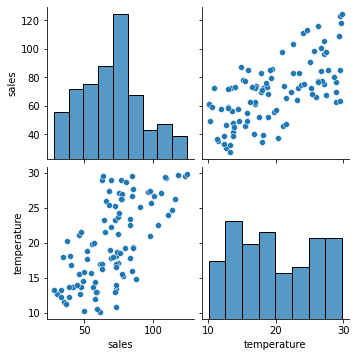

In [5]:
sns.pairplot(file_beer_sales_2)
plt.show()

In [6]:
# stan用データの作成
sample_num = len(file_beer_sales_2)
temperature_pred = range(11,31)

stan_data = {
    'N': sample_num,
    'sales': file_beer_sales_2['sales'],
    'temperature': file_beer_sales_2['temperature'],
    'N_pred': len(temperature_pred),
    'temperature_pred': temperature_pred
}

In [8]:
# stanファイルの作成
if os.path.exists('3-3-1-simple-lm-pred.pkl'):
    sm = pickle.load(open('3-3-1-simple-lm-pred.pkl', 'rb'))
else:
    # a model using prior for mu and sigma.
    sm = pystan.StanModel(file='book-data/3-3-1-simple-lm-pred.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9138a1ed717e8900f1f042371bda8da8 NOW.
C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\s44990\AppData\Local\Temp\tmpb017ta9i\stanfit4anon_model_9138a1ed717e8900f1f042371bda8da8_2030571237733290373.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


CompileError: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\BuildTools\\VC\\Tools\\MSVC\\14.29.30037\\bin\\HostX86\\x64\\cl.exe' failed with exit status 2

In [ ]:
# MCMCの実行
mcmc_result = sm.sampling(
    data=stan_data,
    seed=1,
    chains=4,
    iter=2000,
    warmup=1000,
    thin=1
)

print(mcmc_result)